In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
data=pd.read_csv('creditcard.csv')

In [3]:
data.shape

(284807, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data['Class'].value_counts()/len(data)*100


0    99.827251
1     0.172749
Name: Class, dtype: float64

In [7]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


(array([2.84395e+05, 3.60000e+02, 3.60000e+01, 1.00000e+01, 2.00000e+00,
        1.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0.   ,  2569.116,  5138.232,  7707.348, 10276.464, 12845.58 ,
        15414.696, 17983.812, 20552.928, 23122.044, 25691.16 ]),
 <a list of 10 Patch objects>)

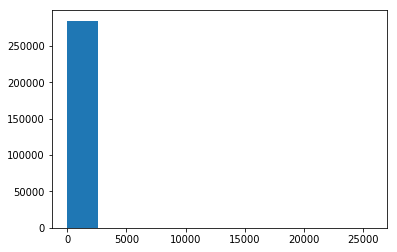

In [8]:
plt.hist(data['Amount'])

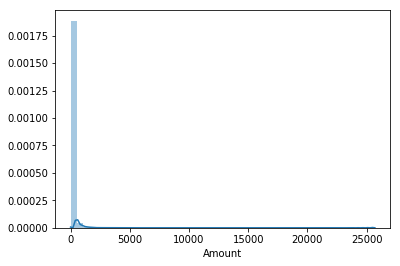

In [9]:
sns.distplot(data['Amount'])

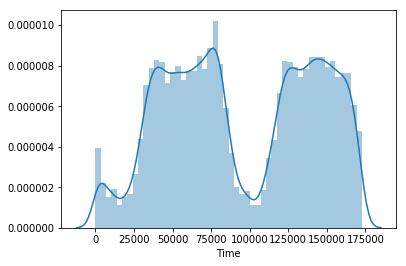

In [10]:
sns.distplot(data['Time'])

In [11]:
data['Amount_lg']=np.log(data['Amount'])

C:\Users\rishabh.jain1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [12]:
data[data['Amount']==0].head(10)    # We have amount 0 transaction in the data 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_lg
383,282.0,-0.356466,0.725418,1.971749,0.831343,0.369681,-0.107776,0.751610,-0.120166,-0.420675,...,0.424312,-0.015989,0.466754,-0.809962,0.657334,-0.043150,-0.046401,0.0,0,-inf
514,380.0,-1.299837,0.881817,1.452842,-1.293698,-0.025105,-1.170103,0.861610,-0.193934,0.592001,...,-0.360853,0.223911,0.598930,-0.397705,0.637141,0.234872,0.021379,0.0,0,-inf
534,403.0,1.237413,0.512365,0.687746,1.693872,-0.236323,-0.650232,0.118066,-0.230545,-0.808523,...,-0.178220,0.038722,0.471218,0.289249,0.871803,-0.066884,0.012986,0.0,0,-inf
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.0,1,-inf
575,430.0,-1.860258,-0.629859,0.966570,0.844632,0.759983,-1.481173,-0.509681,0.540722,-0.733623,...,0.125515,-0.225029,0.586664,-0.031598,0.570168,-0.043007,-0.223739,0.0,0,-inf
936,711.0,-0.431349,1.027694,2.670816,2.084787,-0.274567,0.286856,0.152110,0.200872,-0.596505,...,0.154170,-0.141533,0.384610,-0.147132,-0.087100,0.101117,0.077944,0.0,0,-inf
1059,804.0,1.181697,-0.007908,-0.066845,1.532223,1.728832,4.409885,-1.138816,1.164645,-0.020578,...,-0.399563,0.010200,0.992235,0.457015,-0.027924,0.045273,0.028868,0.0,0,-inf
1072,820.0,-0.937481,0.401649,1.882689,-0.362001,0.751088,-0.899262,0.880557,-0.181650,-0.211657,...,0.097379,-0.324050,0.436521,0.509674,0.454116,-0.201804,-0.175439,0.0,0,-inf
1170,912.0,1.083003,0.201589,1.497664,2.661922,-0.621256,0.618554,-0.644140,0.310919,0.125964,...,0.009647,0.077072,0.072141,0.220747,-0.013483,0.058596,0.032054,0.0,0,-inf
1526,1193.0,1.130646,0.625391,0.837987,2.506543,-0.107116,-0.245548,0.099603,-0.041457,-0.867319,...,-0.014311,0.086559,0.393496,0.332062,-0.066378,0.013858,0.025382,0.0,0,-inf


In [13]:
data[data['Amount']==0].count()    # 1825 cases where Amount=0

Time         1825
V1           1825
V2           1825
V3           1825
V4           1825
V5           1825
V6           1825
V7           1825
V8           1825
V9           1825
V10          1825
V11          1825
V12          1825
V13          1825
V14          1825
V15          1825
V16          1825
V17          1825
V18          1825
V19          1825
V20          1825
V21          1825
V22          1825
V23          1825
V24          1825
V25          1825
V26          1825
V27          1825
V28          1825
Amount       1825
Class        1825
Amount_lg    1825
dtype: int64

In [14]:
data[(data['Amount']==0)&(data['Class']==1)]    # 27 cases out of 492 fraud data cases  i.e., 5.4%  of fraud data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_lg
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.0,1,-inf
8842,12093.0,-4.696795,2.693867,-4.475133,5.467685,-1.556758,-1.549420,-4.104215,0.553934,-1.498468,...,-0.080163,0.318408,-0.245862,0.338238,0.032271,-1.508458,0.608075,0.0,1,-inf
23308,32686.0,0.287953,1.728735,-1.652173,3.813544,-1.090927,-0.984745,-2.202318,0.555088,-2.033892,...,-0.633528,0.092891,0.187613,0.368708,-0.132474,0.576561,0.309843,0.0,1,-inf
42756,41233.0,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,...,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,0.0,1,-inf
69980,53658.0,-1.739341,1.344521,-0.534379,3.195291,-0.416196,-1.261961,-2.340991,0.713004,-1.416265,...,-0.213952,-0.336640,0.237076,0.246003,-0.044228,0.510729,0.220952,0.0,1,-inf
93486,64443.0,1.079524,0.872988,-0.303850,2.755369,0.301688,-0.350284,-0.042848,0.246625,-0.779176,...,-0.158601,-0.038806,-0.060327,0.358339,0.076984,0.018936,0.060574,0.0,1,-inf
93788,64585.0,1.080433,0.962831,-0.278065,2.743318,0.412364,-0.320778,0.041290,0.176170,-0.966952,...,-0.057036,-0.053692,-0.026373,0.400300,0.072828,0.027043,0.063238,0.0,1,-inf
141257,84204.0,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,...,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.0,1,-inf
141258,84204.0,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,...,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.0,1,-inf
143333,85285.0,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,-4.622730,...,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,0.0,1,-inf


1792 non-fraud data and 27 (5.4% of fraud data) fraud cases are of amount is 0

In [15]:
data=data.drop(data[data['Amount']==0].index)

In [16]:
data[data['Amount']==0]   # no such data present now

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_lg


In [17]:
data['Amount_lg']=np.log(data['Amount'])

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282982 entries, 0 to 284806
Data columns (total 32 columns):
Time         282982 non-null float64
V1           282982 non-null float64
V2           282982 non-null float64
V3           282982 non-null float64
V4           282982 non-null float64
V5           282982 non-null float64
V6           282982 non-null float64
V7           282982 non-null float64
V8           282982 non-null float64
V9           282982 non-null float64
V10          282982 non-null float64
V11          282982 non-null float64
V12          282982 non-null float64
V13          282982 non-null float64
V14          282982 non-null float64
V15          282982 non-null float64
V16          282982 non-null float64
V17          282982 non-null float64
V18          282982 non-null float64
V19          282982 non-null float64
V20          282982 non-null float64
V21          282982 non-null float64
V22          282982 non-null float64
V23          282982 non-null float64
V

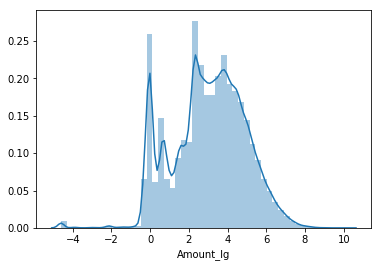

In [19]:
sns.distplot(data['Amount_lg'])     # log transformation for amount

In [20]:
data[data['Time']==0]     # both of these data points is for non-fraud data which we have plethora of data, so dropping them

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_lg
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.008099
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.989541


In [21]:
data=data.drop(data[data['Time']==0].index)
data[data['Time']==0]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_lg


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282980 entries, 2 to 284806
Data columns (total 32 columns):
Time         282980 non-null float64
V1           282980 non-null float64
V2           282980 non-null float64
V3           282980 non-null float64
V4           282980 non-null float64
V5           282980 non-null float64
V6           282980 non-null float64
V7           282980 non-null float64
V8           282980 non-null float64
V9           282980 non-null float64
V10          282980 non-null float64
V11          282980 non-null float64
V12          282980 non-null float64
V13          282980 non-null float64
V14          282980 non-null float64
V15          282980 non-null float64
V16          282980 non-null float64
V17          282980 non-null float64
V18          282980 non-null float64
V19          282980 non-null float64
V20          282980 non-null float64
V21          282980 non-null float64
V22          282980 non-null float64
V23          282980 non-null float64
V

In [23]:
data['Amount'].min()

0.01

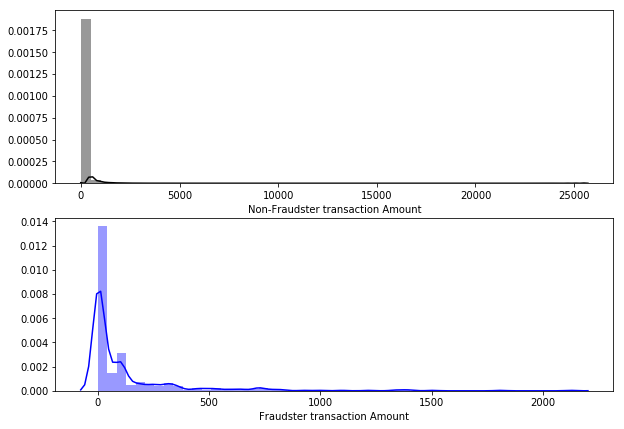

In [24]:
figs, axes= plt.subplots(2, figsize=(10,7))
sns.distplot(data[data['Class']==0]['Amount'], ax=axes[0], axlabel='Non-Fraudster transaction Amount', color='black')
sns.distplot(data[data['Class']==1]['Amount'], ax=axes[1], axlabel='Fraudster transaction Amount', color='blue')

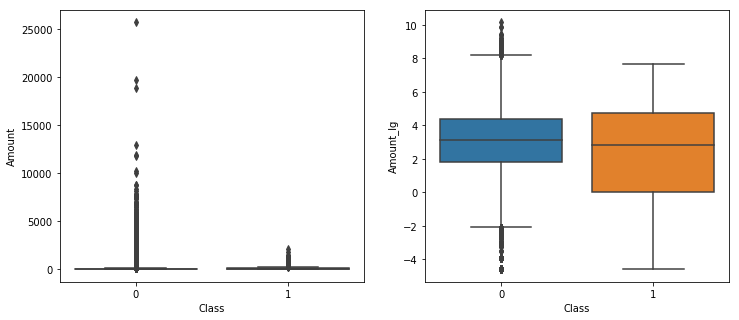

In [25]:
figs, axes= plt.subplots(1,2,figsize=(12,5))
sns.boxplot(x='Class', y='Amount', data=data, ax=axes[0])
sns.boxplot(x='Class', y='Amount_lg',data=data, ax=axes[1])

# Insights
# 1. Fraud transaction has no outlier and are mostly done in specific amount range which can be due to the fact
# that the fraud transaction happened over the period happened in little amounts so that it does not come into notice
# of the account holder.

In [26]:
time=pd.to_timedelta(data['Time'],unit='s')

In [27]:
time    # so after looking to the last data value in the series the data is of two days only
# to take time into factor for fraud to happen we need to see hourly and minutes data for the transactions

2        0 days 00:00:01
3        0 days 00:00:01
4        0 days 00:00:02
5        0 days 00:00:02
6        0 days 00:00:04
7        0 days 00:00:07
8        0 days 00:00:07
9        0 days 00:00:09
10       0 days 00:00:10
11       0 days 00:00:10
12       0 days 00:00:10
13       0 days 00:00:11
14       0 days 00:00:12
15       0 days 00:00:12
16       0 days 00:00:12
17       0 days 00:00:13
18       0 days 00:00:14
19       0 days 00:00:15
20       0 days 00:00:16
21       0 days 00:00:17
22       0 days 00:00:18
23       0 days 00:00:18
24       0 days 00:00:22
25       0 days 00:00:22
26       0 days 00:00:23
27       0 days 00:00:23
28       0 days 00:00:23
29       0 days 00:00:23
30       0 days 00:00:24
31       0 days 00:00:25
               ...      
284777   1 days 23:59:24
284778   1 days 23:59:24
284779   1 days 23:59:26
284780   1 days 23:59:26
284781   1 days 23:59:26
284782   1 days 23:59:27
284783   1 days 23:59:28
284784   1 days 23:59:28
284785   1 days 23:59:28


In [28]:
data['Time_Hour']=(time.dt.components.hours).astype(int)
data['Time_Min']=(time.dt.components.minutes).astype(int)
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Amount_lg,Time_Hour,Time_Min
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.936639,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.816241,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.248352,0,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0,1.300192,0,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0,1.607436,0,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0,3.708682,0,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0,4.534748,0,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0,1.302913,0,0
10,10.0,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,...,0.500512,0.251367,-0.129478,0.042850,0.016253,7.80,0,2.054124,0,0
11,10.0,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.996710,-0.767315,-0.492208,0.042472,-0.054337,9.99,0,2.301585,0,0


In [29]:
data.tail(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Amount_lg,Time_Hour,Time_Min
284787,172769.0,-1.029719,-1.110670,-0.636179,-0.840816,2.424360,-2.956733,0.283610,-0.332656,-0.247488,...,0.107812,-0.935586,1.138216,0.025271,0.255347,9.99,0,2.301585,23,59
284788,172770.0,2.007418,-0.280235,-0.208113,0.335261,-0.715798,-0.751373,-0.458972,-0.140140,0.959971,...,0.064819,-0.608337,0.268436,-0.028069,-0.041367,3.99,0,1.383791,23,59
284789,172770.0,-0.446951,1.302212,-0.168583,0.981577,0.578957,-0.605641,1.253430,-1.042610,-0.417116,...,-0.038712,0.010209,-0.362666,0.503092,0.229921,60.50,0,4.102643,23,59
284790,172771.0,-0.515513,0.971950,-1.014580,-0.677037,0.912430,-0.316187,0.396137,0.532364,-0.224606,...,0.000607,-0.376379,0.128660,-0.015205,-0.021486,9.81,0,2.283402,23,59
284791,172774.0,-0.863506,0.874701,0.420358,-0.530365,0.356561,-1.046238,0.757051,0.230473,-0.506856,...,-0.003988,-0.113149,0.280378,-0.077310,0.023079,20.32,0,3.011606,23,59
284792,172774.0,-0.724123,1.485216,-1.132218,-0.607190,0.709499,-0.482638,0.548393,0.343003,-0.226323,...,0.242669,-0.665424,-0.269869,-0.170579,-0.030692,3.99,0,1.383791,23,59
284793,172775.0,1.971002,-0.699067,-1.697541,-0.617643,1.718797,3.911336,-1.259306,1.056209,1.315006,...,0.726365,-0.058282,-0.191813,0.061858,-0.043716,4.99,0,1.607436,23,59
284794,172777.0,-1.266580,-0.400461,0.956221,-0.723919,1.531993,-1.788600,0.314741,0.004704,0.013857,...,-0.076790,-0.095833,0.132720,-0.028468,0.126494,0.89,0,-0.116534,23,59
284795,172778.0,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0,2.289500,23,59
284796,172780.0,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,...,-0.053206,0.316403,-0.461441,0.018265,-0.041068,60.00,0,4.094345,23,59


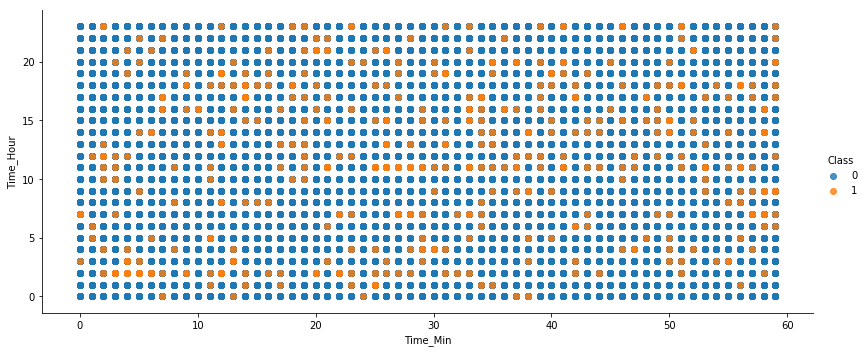

In [30]:
#plt.figure(figsize=(20,10))
sns.lmplot(y='Time_Hour', x='Time_Min', data=data, hue='Class', fit_reg=False, aspect=2.3)

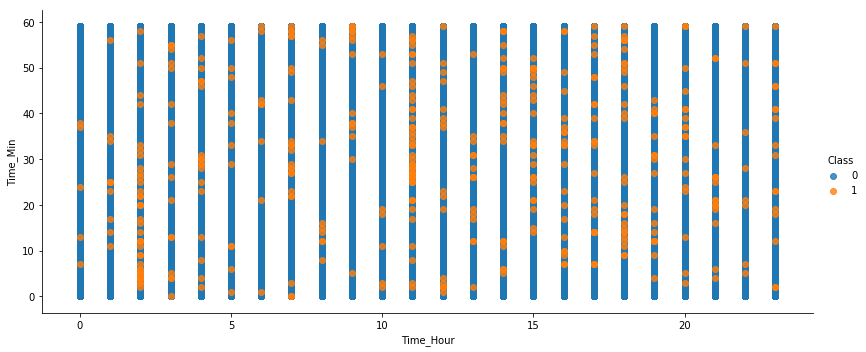

In [31]:
sns.lmplot(y='Time_Min', x='Time_Hour', data=data, hue='Class', fit_reg=False, aspect=2.3)

# from below graph one can't suggest for particular fraud timings

In [32]:
# It can be seen that Minutes does not give any pattern however Hour data has some uniquely distinguished hours like 11 or 2
# when the fraud is happening
pivot=pd.DataFrame(pd.pivot_table(data,index='Time_Hour', columns='Class', values='Amount', aggfunc='count', margins=True))
pivot

Class,0,1,All
Time_Hour,,,
0,7619,5,7624
1,4179,10,4189
2,3249,57,3306
3,3442,16,3458
4,2160,19,2179
5,2971,11,2982
6,4076,8,4084
7,7124,23,7147
8,10213,9,10222


In [33]:
df=pd.DataFrame(pivot[1]/465*100)  # 465 is All fraud cases in dataset
df['Time_Hour']=df.index
df=df.reset_index(drop=True)

In [34]:
df=df[:-1]   # dropping 'ALL' row present in the last

In [35]:
df.rename(columns={1:'Fraud_Percentage'},inplace=True)

In [36]:
df

,Fraud_Percentage,Time_Hour
0,1.075269,0
1,2.150538,1
2,12.258065,2
3,3.440860,3
4,4.086022,4
5,2.365591,5
6,1.720430,6
7,4.946237,7
8,1.935484,8
9,3.225806,9


C:\Users\rishabh.jain1\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


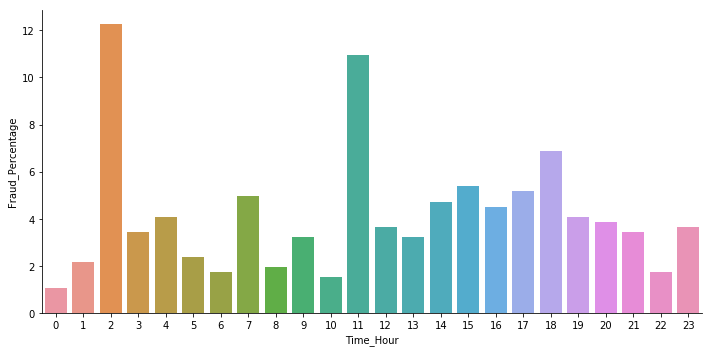

In [37]:
sns.factorplot(x='Time_Hour', y='Fraud_Percentage', data=df, kind='bar', aspect=2)

# So below graph shows that Hourly data is importatnt to keep

In [38]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Amount_lg,Time_Hour,Time_Min
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.936639,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.816241,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.248352,0,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0,1.300192,0,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0,1.607436,0,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0,3.708682,0,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0,4.534748,0,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0,1.302913,0,0
10,10.0,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,...,0.500512,0.251367,-0.129478,0.042850,0.016253,7.80,0,2.054124,0,0
11,10.0,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.996710,-0.767315,-0.492208,0.042472,-0.054337,9.99,0,2.301585,0,0


In [39]:
df1=data.drop(['Time','Amount'], axis=1)   # dropping Time as we have extracted hour and minutes
                                                  # dropping amount as we have transformed it

In [40]:
df1.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'Amount_lg',
       'Time_Hour', 'Time_Min'],
      dtype='object')

In [41]:
df1=df1[['Time_Hour', 'Time_Min','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount_lg', 'Class']]
df1.head()

,Time_Hour,Time_Min,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount_lg,Class
2,0,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.936639,0
3,0,0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.816241,0
4,0,0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.248352,0
5,0,0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,1.300192,0
6,0,0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,1.607436,0


In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282980 entries, 2 to 284806
Data columns (total 32 columns):
Time_Hour    282980 non-null int32
Time_Min     282980 non-null int32
V1           282980 non-null float64
V2           282980 non-null float64
V3           282980 non-null float64
V4           282980 non-null float64
V5           282980 non-null float64
V6           282980 non-null float64
V7           282980 non-null float64
V8           282980 non-null float64
V9           282980 non-null float64
V10          282980 non-null float64
V11          282980 non-null float64
V12          282980 non-null float64
V13          282980 non-null float64
V14          282980 non-null float64
V15          282980 non-null float64
V16          282980 non-null float64
V17          282980 non-null float64
V18          282980 non-null float64
V19          282980 non-null float64
V20          282980 non-null float64
V21          282980 non-null float64
V22          282980 non-null float64
V23  

In [43]:
df1['Time_Hour']=df1['Time_Hour'].astype('category')
df1['Time_Min']=df1['Time_Hour'].astype('category')
df1['Class']=df1['Class'].astype('category')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282980 entries, 2 to 284806
Data columns (total 32 columns):
Time_Hour    282980 non-null category
Time_Min     282980 non-null category
V1           282980 non-null float64
V2           282980 non-null float64
V3           282980 non-null float64
V4           282980 non-null float64
V5           282980 non-null float64
V6           282980 non-null float64
V7           282980 non-null float64
V8           282980 non-null float64
V9           282980 non-null float64
V10          282980 non-null float64
V11          282980 non-null float64
V12          282980 non-null float64
V13          282980 non-null float64
V14          282980 non-null float64
V15          282980 non-null float64
V16          282980 non-null float64
V17          282980 non-null float64
V18          282980 non-null float64
V19          282980 non-null float64
V20          282980 non-null float64
V21          282980 non-null float64
V22          282980 non-null float64

In [44]:
df1=df1.reset_index(drop=True)

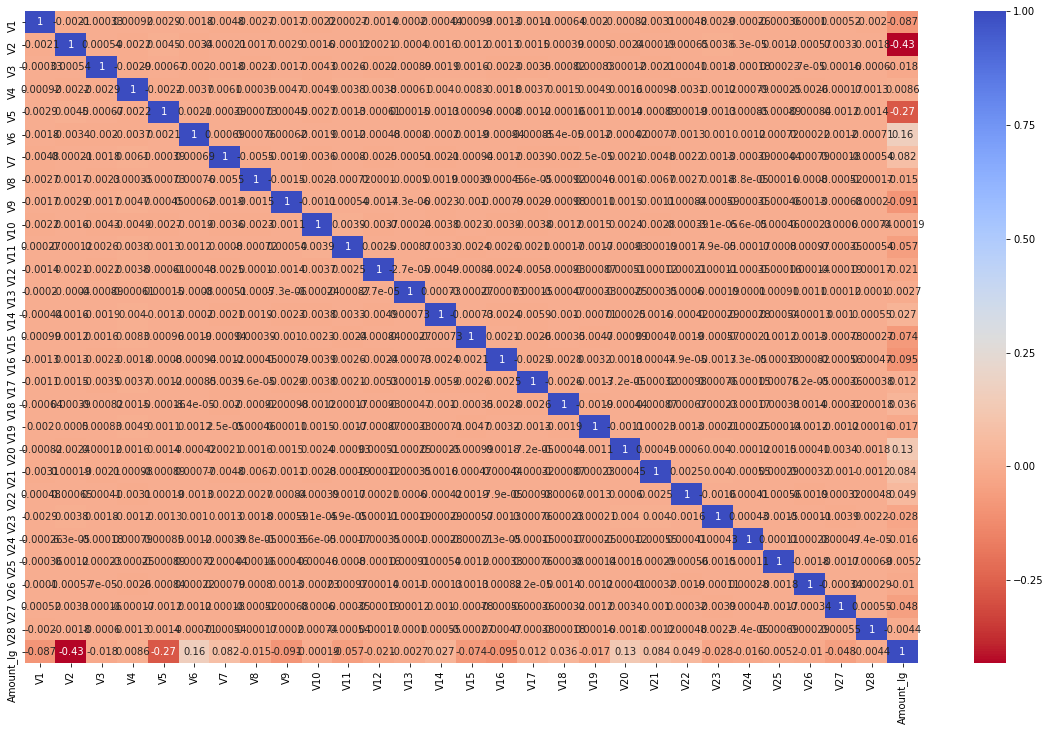

In [45]:
corr=df1.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, cmap='coolwarm_r',annot=True)

# No such correlation is found in between the continuous variables

In [46]:
df1.select_dtypes(include='category').columns

Index(['Time_Hour', 'Time_Min', 'Class'], dtype='object')

In [47]:
category=['Time_Hour','Time_Min']

for i in category:
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df1['Class'], df1[i]))
    print('p-value for {} is {}'.format(i,p))
    
# For both p-value is coming very less that means no such correlation between these two categorical variables and
# each of them play a good role in modelling

p-value for Time_Hour is 5.225413004883887e-128
p-value for Time_Min is 5.225413004883887e-128


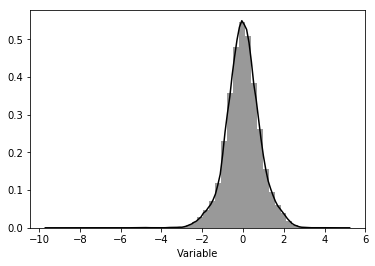

In [48]:
sns.distplot(df1[:]['V18'], axlabel='Variable', color='black')   # df1['Class']==0

In [49]:
cont_variable=df1.select_dtypes(include='float64').columns
cont_variable=cont_variable[:-1]
df_cont=df1[cont_variable]

In [50]:
df_cont.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
3,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080
4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168
5,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339
6,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404
7,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076
8,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,1.626659,...,-0.221365,-0.387226,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253
9,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,0.309755,...,0.707664,0.125992,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337


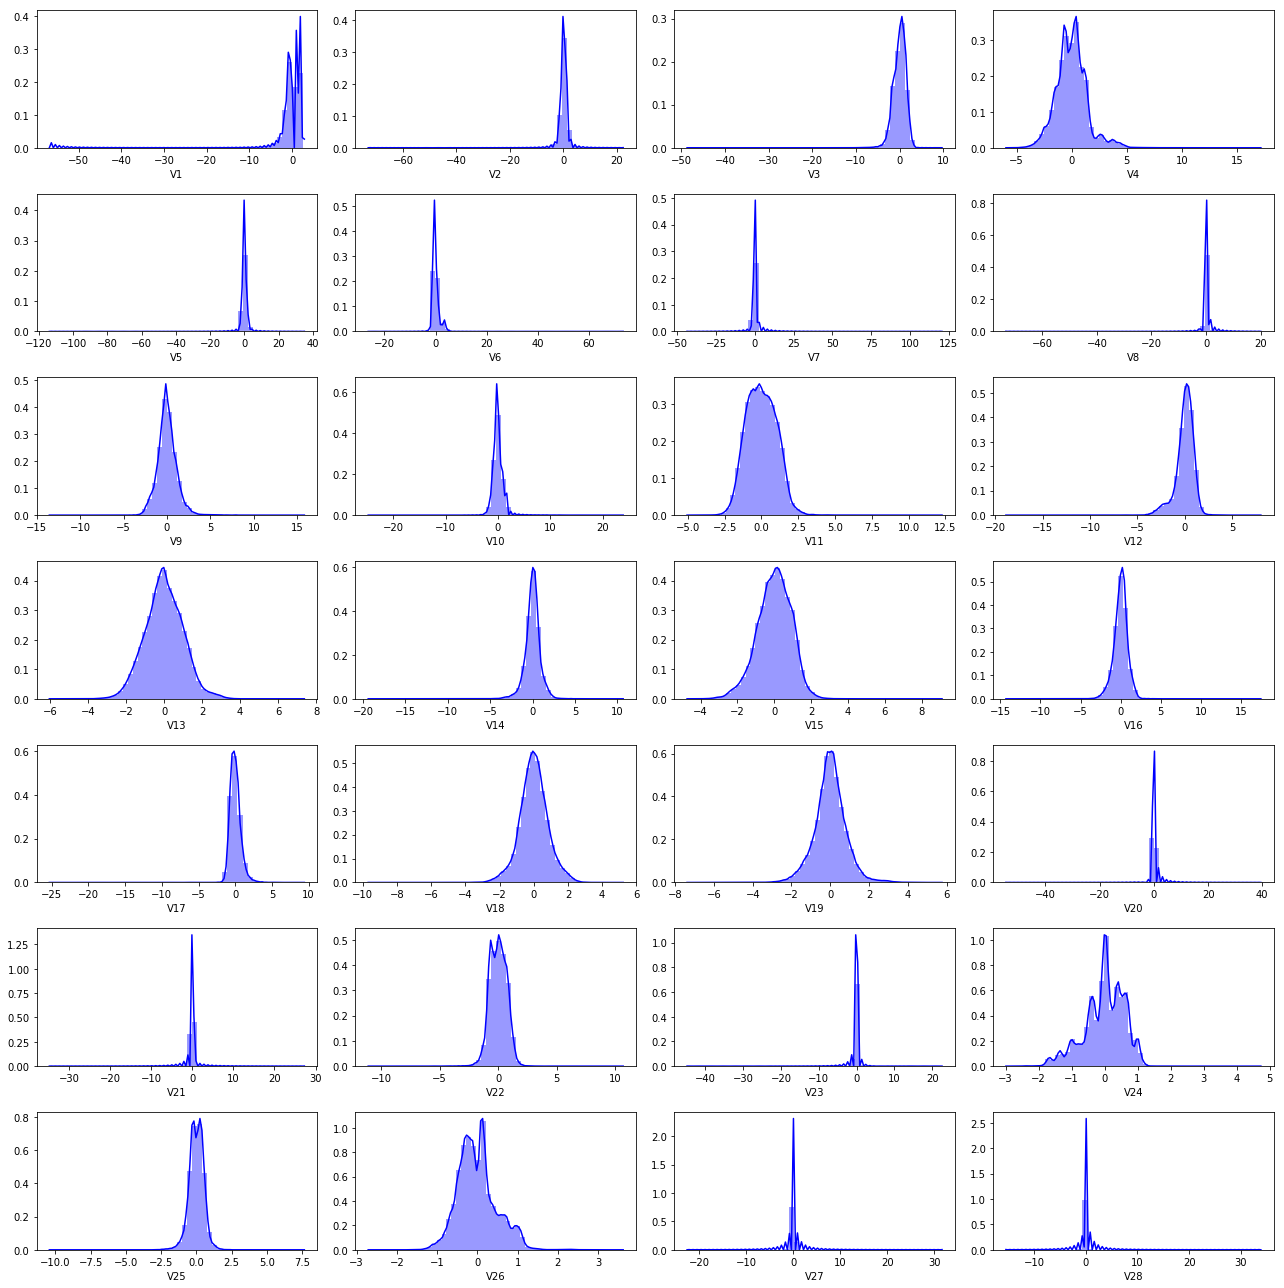

In [51]:
plt.figure(figsize=(18,18))
for k in range(28):
    plt.subplot(7,4,k+1)
    plt.tight_layout()
    #print('i:{}  j:{}  k:{}'.format(i,j,k))
    sns.distplot(df_cont.iloc[:,k], axlabel=str(df_cont.columns[k]), color='blue')  

In [54]:
a=pd.DataFrame(df1['V27'])
a=np.log(a)
a.isnull().sum()

C:\Users\rishabh.jain1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


V27    140109
dtype: int64

In [55]:
df_bx=df1.iloc[:,2:]
df_bx=df_bx.drop('Amount_lg',axis=1)
df_bx.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
3,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0
4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0
5,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0
6,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0
7,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0
8,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,1.626659,...,-0.387226,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,0
9,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,0.309755,...,0.125992,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,0


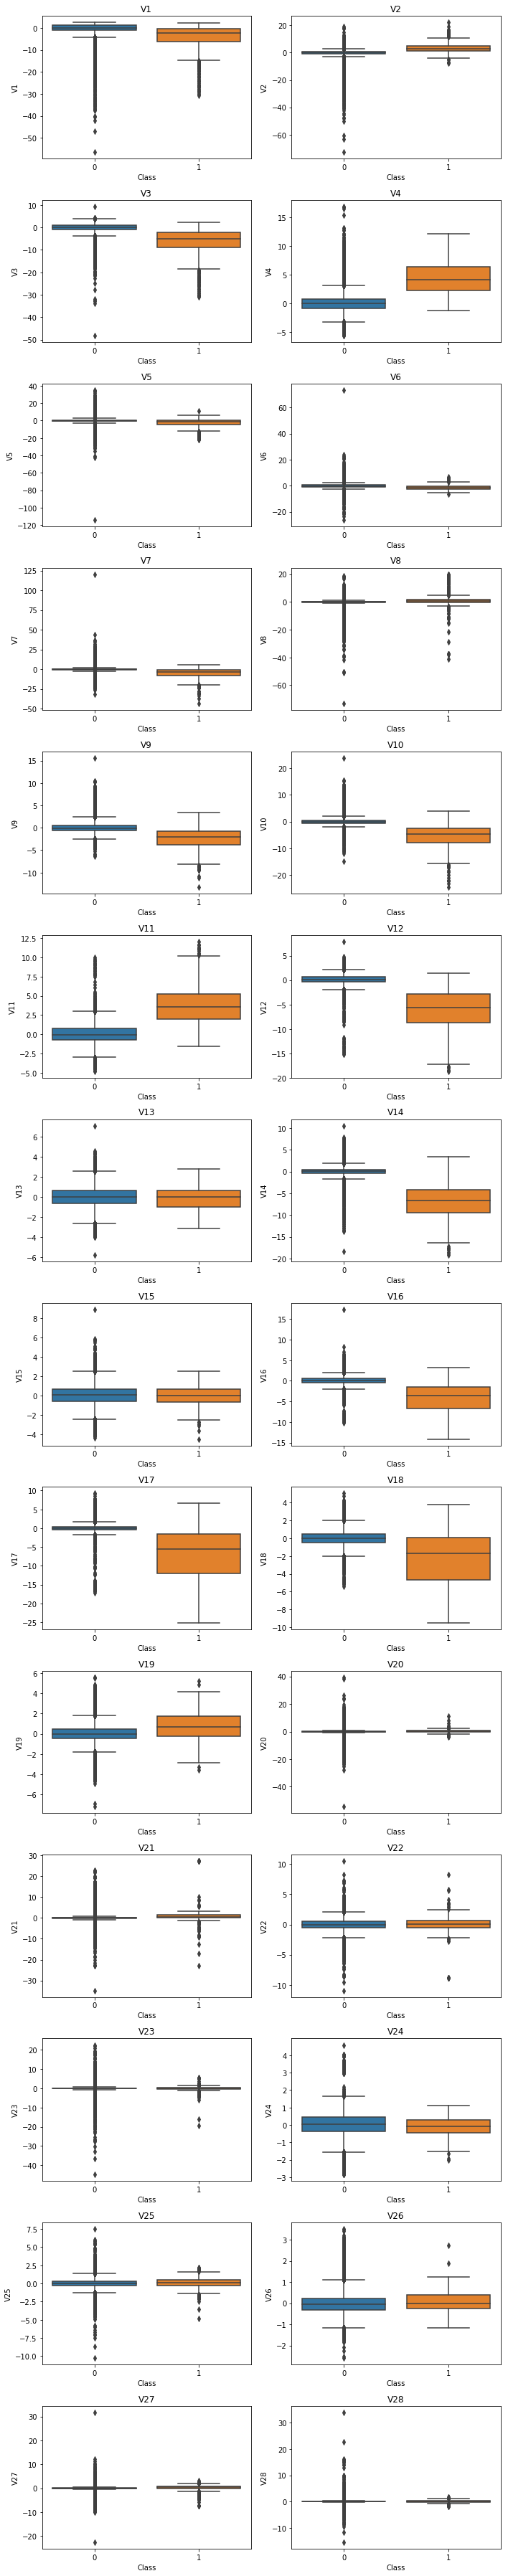

In [56]:
plt.figure(figsize=(10,50))
for k in range(28):
    plt.subplot(14,2,k+1)
    plt.tight_layout()
    #print('i:{}  j:{}  k:{}'.format(i,j,k))
    sns.boxplot(x='Class', y=str(df_bx.columns[k]), data=df_bx).set_title(str(df_cont.columns[k]))

In [57]:
#Threshold - V1: -38, V2: -50, V3: 5, -30, V4: 13, V5: -60, V6: 40, V7: 60, V8: -43, V9: 13, V10:20, V12:6,-11, V13:-5,5
# V14: -15,8, V15:6, V16:10, V19:-6, V20:-35,30, V21: -30, V22:8, V23:-40, V27: -15,15, V28: 20

In [58]:
lower_upper=pd.read_csv('Lower-Upper_range.csv')# CSV File containing all threshold (look for Outlier Threshold file in repository)
lower_upper.head(16)

,lower,upper
0,-38.0,NaN
1,-50.0,NaN
2,-30.0,5.0
3,NaN,13.0
4,-60.0,NaN
5,NaN,40.0
6,NaN,60.0
7,-43.0,NaN
8,NaN,13.0
9,NaN,20.0


In [59]:
dd=df1.copy()

In [60]:
dd.shape

(282980, 32)

In [61]:
# Dropping the outliers in class NON-Fraud

for i in range(2,30):
    if lower_upper.loc[i-2,'lower']!=np.nan:
        l=lower_upper.loc[i-2,'lower']
        ind=dd.loc[(dd['Class']==0)&(dd.iloc[:,i]<l)].index    #(dd.iloc[:,i]>lower_upper.loc[i-2,'lower'])
        print('Outliers Index below lower bound of {}'.format('V'+str(i-1)))
        print(ind)
        dd=dd.drop(ind)
    if lower_upper.loc[i-2,'upper']!=np.nan:
        u=lower_upper.loc[i-2,'upper']
        ind=dd.loc[(dd['Class']==0)&(dd.iloc[:,i]>u)].index
        print('Outliers Index above upper bound of {}'.format('V'+str(i-1)))
        print(ind)
        dd=dd.drop(ind)

Outliers Index below lower bound of V1
Int64Index([39418, 204825, 218700, 223021, 232916], dtype='int64')
Outliers Index above upper bound of V1
Int64Index([], dtype='int64')
Outliers Index below lower bound of V2
Int64Index([57996, 150306, 227151], dtype='int64')
Outliers Index above upper bound of V2
Int64Index([], dtype='int64')
Outliers Index below lower bound of V3
Int64Index([43048, 43062, 43883, 67900, 272986], dtype='int64')
Outliers Index above upper bound of V3
Int64Index([117944], dtype='int64')
Outliers Index below lower bound of V4
Int64Index([], dtype='int64')
Outliers Index above upper bound of V4
Int64Index([24416], dtype='int64')
Outliers Index below lower bound of V5
Int64Index([], dtype='int64')
Outliers Index above upper bound of V5
Int64Index([], dtype='int64')
Outliers Index below lower bound of V6
Int64Index([], dtype='int64')
Outliers Index above upper bound of V6
Int64Index([], dtype='int64')
Outliers Index below lower bound of V7
Int64Index([], dtype='int64')


In [62]:
dd.shape

(282937, 32)

In [63]:
# Distribution after removing Outliers

cont_variable=dd.select_dtypes(include='float64').columns
cont_variable=cont_variable[:-1]
df_cont=dd[cont_variable]

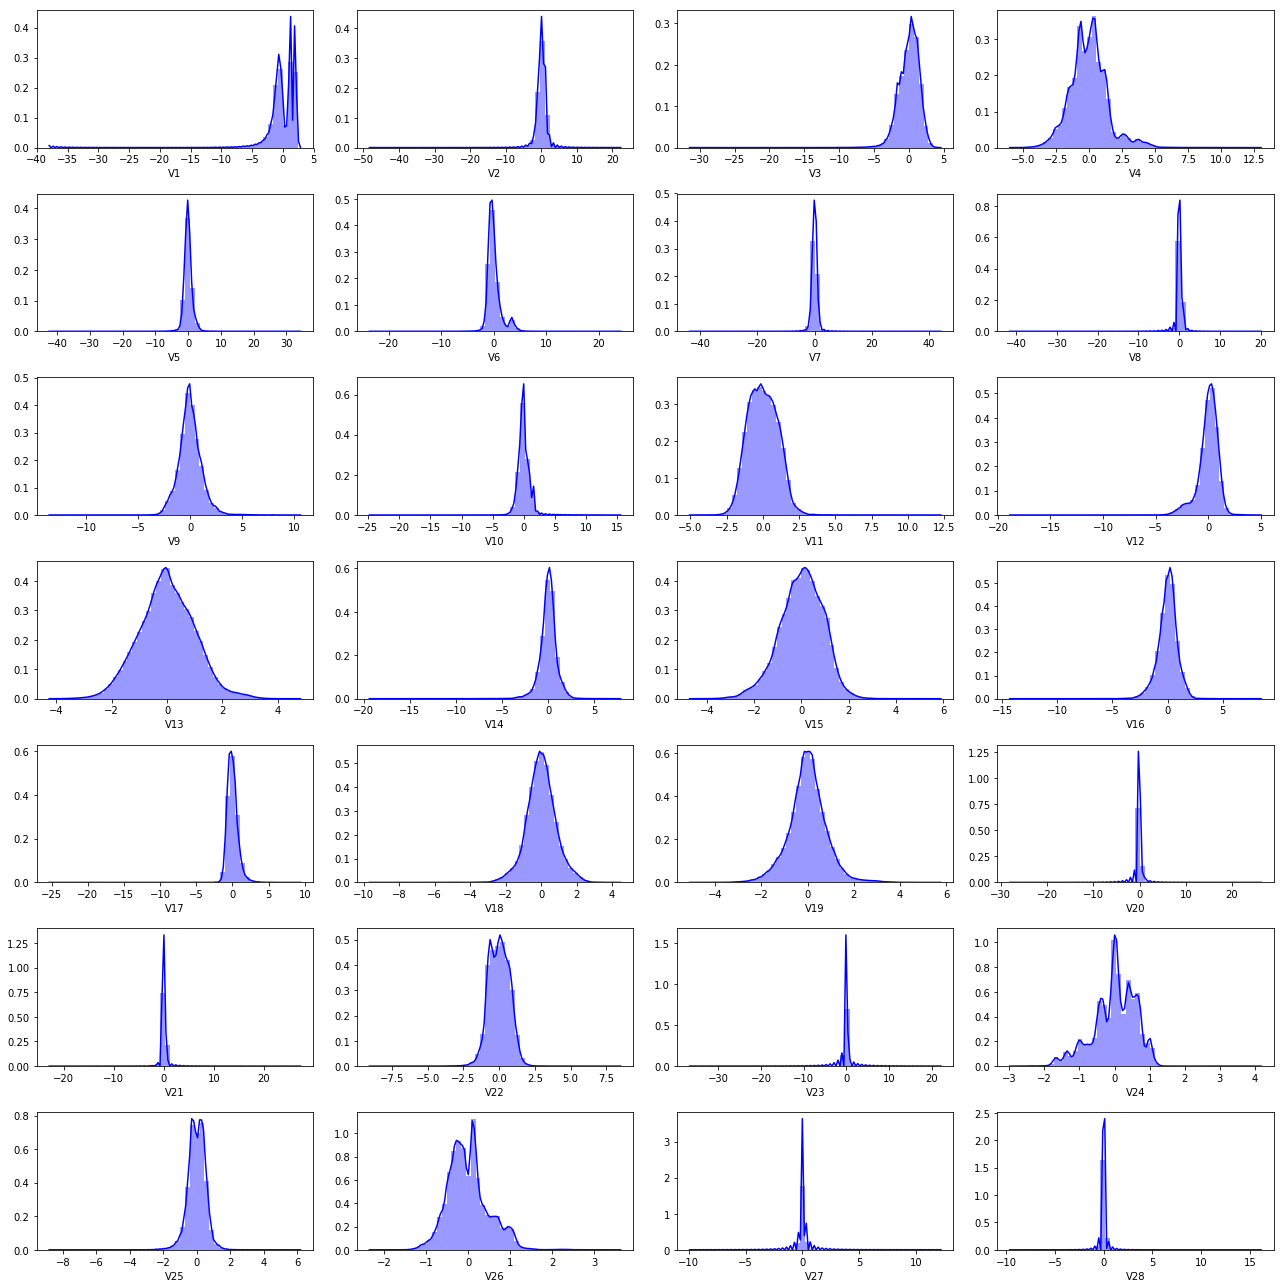

In [64]:
plt.figure(figsize=(18,18))
for k in range(28):
    plt.subplot(7,4,k+1)
    plt.tight_layout()
    #print('i:{}  j:{}  k:{}'.format(i,j,k))
    sns.distplot(df_cont.iloc[:,k], axlabel=str(df_cont.columns[k]), color='blue')  

In [65]:
dd['Class'].value_counts()/len(dd)

0    0.998357
1    0.001643
Name: Class, dtype: float64

# Unbalanced Data solution

In [66]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from collections import Counter

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, precision_recall_curve,average_precision_score, accuracy_score

Using TensorFlow backend.


In [67]:
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
# Using stratifiedsample shuffling because of high imbalanced data

In [68]:
X = dd.drop('Class', axis=1)  #df1
y = dd['Class']
y=y.astype('int64')

In [69]:
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]

Train: [ 30086  30100  30141 ... 282934 282935 282936] Test: [    0     1     2 ... 56645 56646 56647]
Train: [     0      1      2 ... 282934 282935 282936] Test: [ 30086  30100  30141 ... 113221 113222 113223]
Train: [     0      1      2 ... 282934 282935 282936] Test: [ 78882  78893  79192 ... 169825 169826 169827]
Train: [     0      1      2 ... 282934 282935 282936] Test: [148581 148849 148854 ... 226370 226371 226372]
Train: [     0      1      2 ... 226370 226371 226372] Test: [203049 207170 211012 ... 282934 282935 282936]


In [70]:
Xtrain=Xtrain.values
Xtest=Xtest.values
ytrain=ytrain.values
ytest=ytest.values

In [71]:
accuracy_vals = []
precision_vals = []
recall_vals = []
f1_vals = []
auc_vals = []

In [72]:
log_reg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], "solver":['lbfgs','liblinear']}      #"penalty": ['l1', 'l2']
rand_log_reg = RandomizedSearchCV(LogisticRegression(max_iter=250), log_reg_params, n_iter=4)

In [73]:
for train, test in sss.split(Xtrain, ytrain):
    # SMOTE happens during Cross Validation
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) 
    model = pipeline.fit(Xtrain[train], ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(Xtrain[test])
    
    accuracy_vals.append(pipeline.score(Xtrain[test], ytrain[test]))
    precision_vals.append(precision_score(ytrain[test], prediction))
    recall_vals.append(recall_score(ytrain[test], prediction))
    f1_vals.append(f1_score(ytrain[test], prediction))
    auc_vals.append(roc_auc_score(ytrain[test], prediction))

C:\Users\rishabh.jain1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [74]:
best_est

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
print("accuracy: {}".format(np.mean(accuracy_vals)))
print("precision: {}".format(np.mean(precision_vals)))
print("recall: {}".format(np.mean(recall_vals)))
print("f1: {}".format(np.mean(f1_vals)))

accuracy: 0.9687961122155955
precision: 0.04727069943541716
recall: 0.9006126126126126
f1: 0.08965709526003768


In [76]:
print("auc: {}".format(np.mean(auc_vals)))

auc: 0.9347605209009362


In [77]:
smote_prediction = best_est.predict(Xtest)
print(classification_report(ytest, smote_prediction))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56494
           1       0.04      0.91      0.08        93

    accuracy                           0.96     56587
   macro avg       0.52      0.94      0.53     56587
weighted avg       1.00      0.96      0.98     56587



In [78]:
y_score = best_est.decision_function(Xtest)

In [79]:
average_precision = average_precision_score(ytest, y_score)
print('Average precision-recall score: {}'.format(average_precision))

Average precision-recall score: 0.8198947317736699


In [85]:
precision, recall, thresholds = precision_recall_curve(ytest, y_score)

Text(0.5, 1.0, 'OverSampling(SMOTE) ROC curve: \n Average Precision-Recall Score =0.820 \n Area under curve = 0.935')

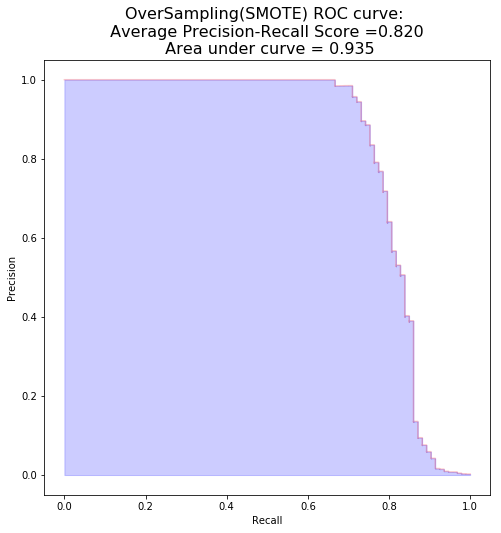

In [86]:
plt.figure(figsize=(8,8))
plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('OverSampling(SMOTE) ROC curve: \n Average Precision-Recall Score ={0:0.3f} \n Area under curve = {1:0.3f}'
          .format(average_precision, np.mean(auc_vals)), fontsize=16)

In [87]:
tree_params = { "criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}

In [88]:
model = DecisionTreeClassifier() 

In [90]:
rand_DT = RandomizedSearchCV(model, tree_params, n_iter=4)

In [91]:
accuracy_vals_DT = []
precision_vals_DT = []
recall_vals_DT = []
f1_vals_DT = []
auc_vals_DT = []

In [92]:
for train, test in sss.split(Xtrain, ytrain):
    # SMOTE happens during Cross Validation
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_DT) 
    model = pipeline.fit(Xtrain[train], ytrain[train])
    best_est = rand_DT.best_estimator_
    prediction = best_est.predict(Xtrain[test])
    
    accuracy_vals_DT.append(pipeline.score(Xtrain[test], ytrain[test]))
    precision_vals_DT.append(precision_score(ytrain[test], prediction))
    recall_vals_DT.append(recall_score(ytrain[test], prediction))
    f1_vals_DT.append(f1_score(ytrain[test], prediction))
    auc_vals_DT.append(roc_auc_score(ytrain[test], prediction))

In [93]:
best_est

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [95]:
print("accuracy: {}".format(np.mean(accuracy_vals_DT)))
print("precision: {}".format(np.mean(precision_vals_DT)))
print("recall: {}".format(np.mean(recall_vals_DT)))
print("f1: {}".format(np.mean(f1_vals_DT)))

accuracy: 0.9755732273028496
precision: 0.0889734252062275
recall: 0.8577657657657657
f1: 0.15652917451044904


In [97]:
print("auc: {}".format(np.mean(auc_vals_DT)))

auc: 0.9167666894039577


In [98]:
smote_prediction = best_est.predict(Xtest)
print(classification_report(ytest, smote_prediction))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56494
           1       0.18      0.82      0.30        93

    accuracy                           0.99     56587
   macro avg       0.59      0.91      0.65     56587
weighted avg       1.00      0.99      1.00     56587



In [99]:
y_score = best_est.predict_proba(Xtest)[:, 1]

In [100]:
y_score

array([0.99915546, 0.99915546, 0.99915546, ..., 0.34109778, 0.04707128,
       0.04707128])

In [105]:
average_precision_DT = average_precision_score(ytest, y_score)
print('Average precision-recall score: {}'.format(average_precision_DT))

Average precision-recall score: 0.5213270940585607


In [106]:
precision, recall, thresholds = precision_recall_curve(ytest, y_score)

Text(0.5, 1.0, 'OverSampling(SMOTE) ROC curve: \n Average Precision-Recall Score =0.521 \n Area under curve = 0.917')

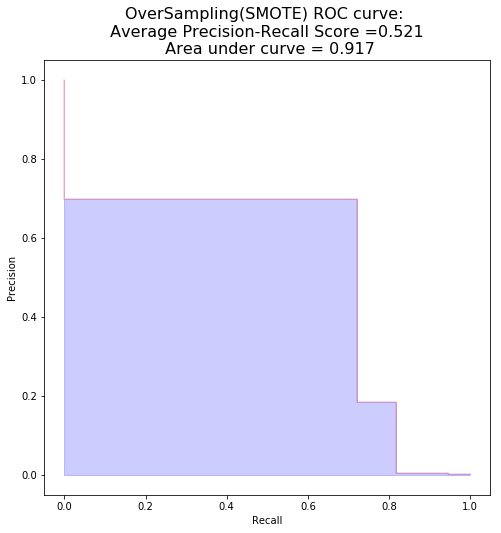

In [107]:
plt.figure(figsize=(8,8))
plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('OverSampling(SMOTE) ROC curve: \n Average Precision-Recall Score ={0:0.3f} \n Area under curve = {1:0.3f}'
          .format(average_precision_DT, np.mean(auc_vals_DT)), fontsize=16)